In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [2]:
df=pd.read_csv('C:\pallavi\IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

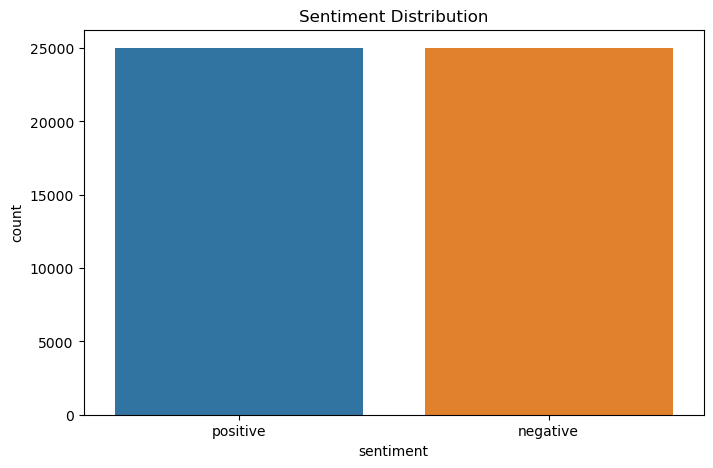

In [7]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

Lowercasing

In [8]:
df['review']=df['review'].str.lower()

In [9]:
# Removing html tags


In [10]:
import re 
def remove_html_tags(text):
    pattern =re.compile('<.*?>')
    return pattern.sub(r'',text)

In [11]:
df['review']=df['review'].apply(remove_html_tags)

In [12]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [13]:
df['review'][3]

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

removing URls

In [14]:
def remove_url(text):
    pattern =re.compile(r'https?//\S+|www\.\S+')
    return pattern.sub(r'',text)
    

In [15]:
df['review']=df['review'].apply(remove_url)

In [16]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [17]:
df['review'][45366]

'quite possibly the worst movie i\'ve ever seen; i was ready to walk out after the first ten minutes. the only people laughing in the theater were the tweeners. don\'t get me wrong, i love silly, stupid movies just as much as the next gal, but the whole premise, writing and humor stunk. it seemed to me that they were going for a "napoleon dynamite" feel - strange and random scenes which would lead to a cult audience. instead, it ended up being forced, awkward and weird.the only bright light was isla fisher and i just felt utterly awful that she (and sissy spacek) had signed up for this horrible thing.thank gosh i didn\'t pay for it.'

Remove Punctuation marks

In [18]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
exclude=string.punctuation

In [20]:
def remove_punc(text):
   return text.translate(str.maketrans('','',exclude))

In [21]:
df['review']=df['review'].apply(remove_punc)

In [22]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [23]:
df['review'][123] 

'ah yes the 1980s  a time of reaganomics and sly  chuck and a host of other action stars hiding in a remote jungle blowing away commies  at the time i couldnt believe how movies like rambo  missing in action and uncommon valor  and who can forget the ridiculous red dawn   made money at the box office  theyre turgid action crap fests with a rather off putting right wing agenda and they have dated very badly  tromas war is a tongue in cheek take on these type of movies but youve got to ask yourself did they need spoofing in the first place  of course not  tromas war lacks any sort of sophistication  though it does make the point that theres no real difference between right wing tyrants and left wing ones  and sometimes feels more like a grade z movie than a send up  maybe it is '

In [24]:
import nltk
from nltk.corpus import stopwords




In [25]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
from nltk.corpus import stopwords
sw_list = stopwords.words('english')
sw_list


df['review']= df['review'].apply(lambda x:[item for item in x.split() if item not in sw_list]).apply(lambda x:' '.join(x))
df.head()


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


# Tokenization

In [28]:
import   gensim
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess


In [29]:
df['review'] = df['review'].apply(lambda x: word_tokenize(x))
df['review']


0        [one, reviewers, mentioned, watching, 1, oz, e...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, theres, family, little, boy, jake,...
4        [petter, matteis, love, time, money, visually,...
                               ...                        
49995    [thought, movie, right, good, job, wasnt, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [im, going, disagree, previous, comment, side,...
49999    [one, expects, star, trek, movies, high, art, ...
Name: review, Length: 50000, dtype: object

# Lemmatization:-

In [30]:
from nltk.stem import WordNetLemmatizer

In [31]:
# Download WordNet
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()


In [33]:

# Apply lemmatization
df['review'] = df['review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [34]:
# Join the lemmatized tokens back into sentences
df['review'] = df['review'].apply(lambda x: ' '.join(x))


In [35]:
# Display the updated DataFrame
df.head()


,review,sentiment
0,one reviewer mentioned watching 1 oz episode y...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


In [36]:
df['review'][0]

'one reviewer mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison b

# Train-Test split:-

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


# TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()


In [39]:
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [40]:
# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [41]:

import warnings

warnings.filterwarnings("ignore")


In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word clouds
def generate_word_cloud(data, title):
    wordcloud = WordCloud(width=1000, height=600, 
                          background_color='black', 
                          stopwords=set(stopwords.words('english')), 
                          min_font_size=10).generate(data)

    # Plot the WordCloud image                        
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad=0) 
    plt.title(title)
  
    plt.show()

# Concatenate TF-IDF transformed positive and negative reviews for train and test datasets
X_train_positive_tfidf = ' '.join(X_train[y_train == 'positive'])
X_train_negative_tfidf = ' '.join(X_train[y_train == 'negative'])

X_test_positive_tfidf = ' '.join(X_test[y_test == 'positive'])
X_test_negative_tfidf = ' '.join(X_test[y_test == 'negative'])




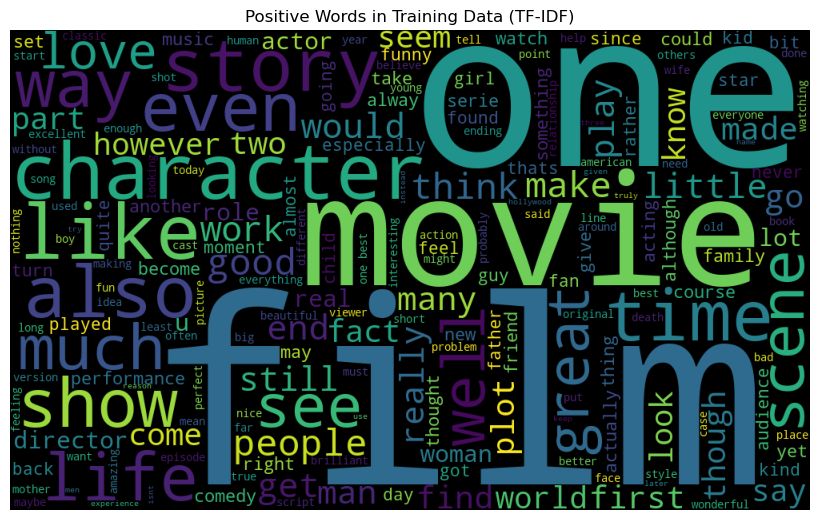

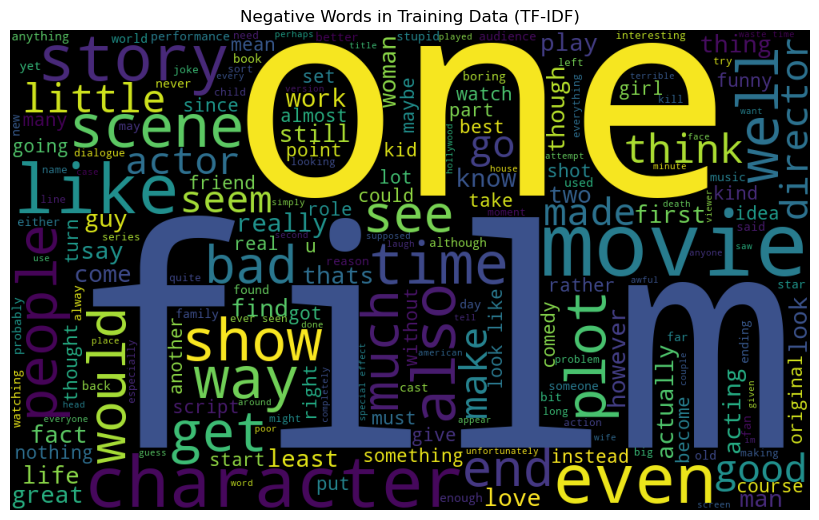

In [43]:
# Generate and display word clouds for training data
generate_word_cloud(X_train_positive_tfidf, 'Positive Words in Training Data (TF-IDF)')
generate_word_cloud(X_train_negative_tfidf, 'Negative Words in Training Data (TF-IDF)')


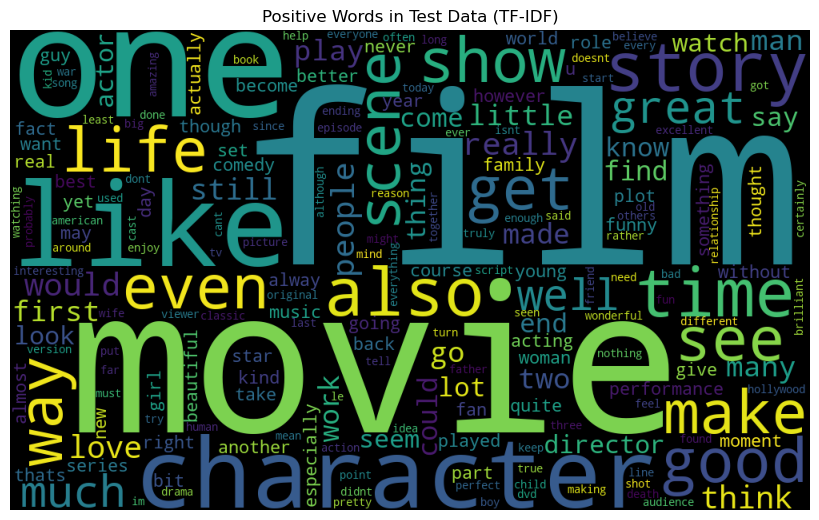

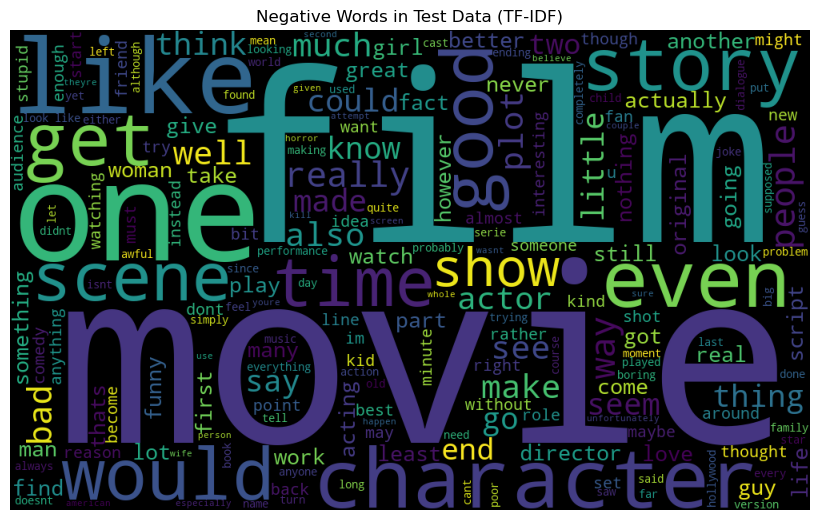

In [44]:
# Generate and display word clouds for test data
generate_word_cloud(X_test_positive_tfidf, 'Positive Words in Test Data (TF-IDF)')
generate_word_cloud(X_test_negative_tfidf, 'Negative Words in Test Data (TF-IDF)')


# Machine Learning Classifiers

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Decision tree

In [46]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
dt_pred = dt_model.predict(X_test_tfidf)

print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))


Decision Tree Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.72      0.72      4961
    positive       0.72      0.71      0.72      5039

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



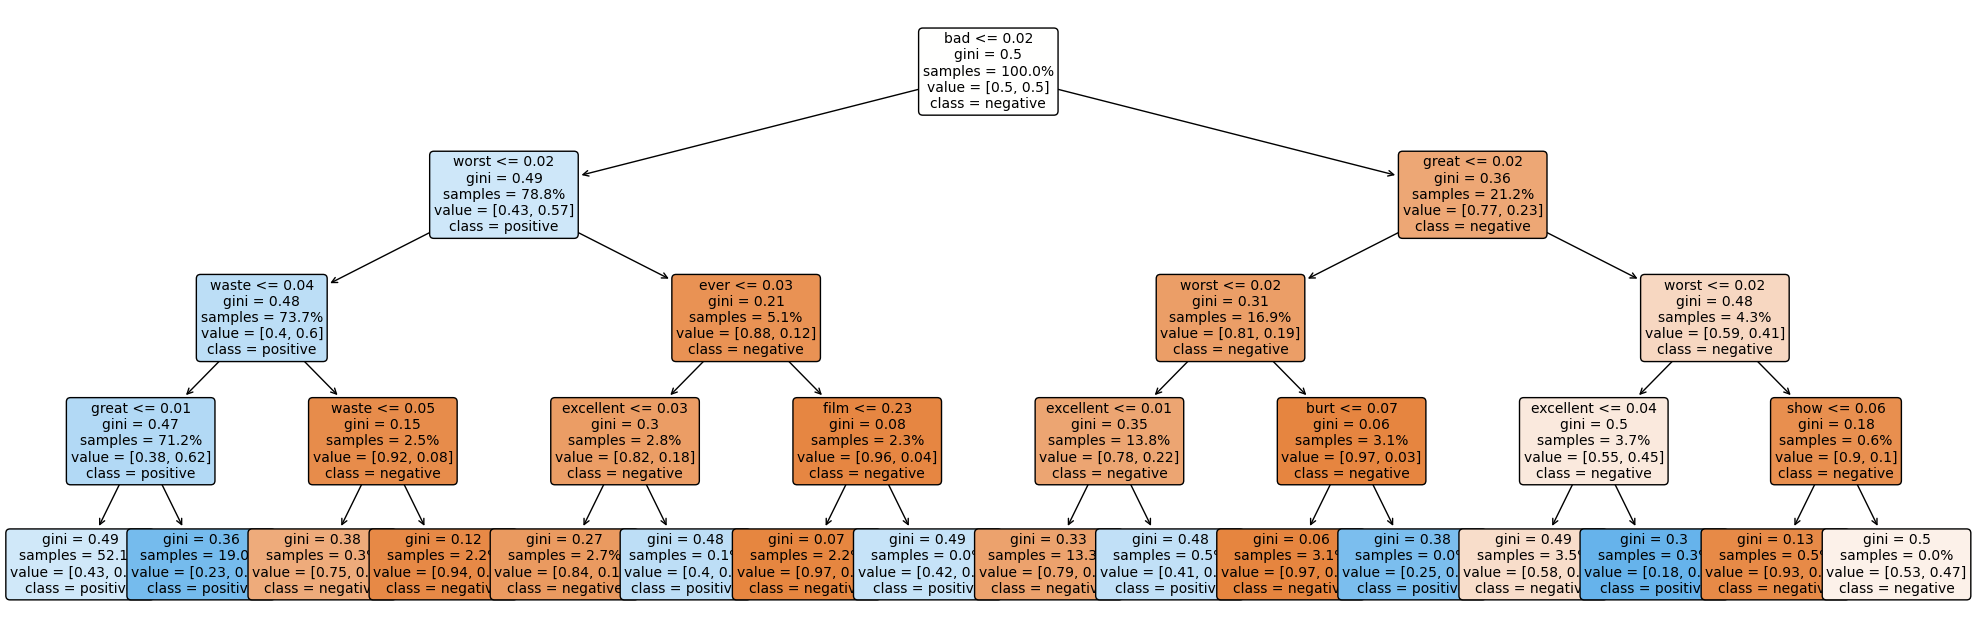

In [47]:
# Train a decision tree classifier with a maximum depth of 5
dt_model1 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model1.fit(X_train_tfidf, y_train)

# Visualize the decision tree
plt.figure(figsize=(25, 8))
plot_tree(dt_model1, feature_names=tfidf_vectorizer.get_feature_names_out(), class_names=['negative', 'positive'], filled=True, rounded=True, fontsize=10, precision=2, impurity=True, proportion=True)
plt.show()


# XGB Classifier

In [48]:
from xgboost import XGBClassifier

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable for both training and test sets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_tfidf, y_train_encoded)
xgb_pred = xgb_model.predict(X_test_tfidf)
print("\nXGBoost Classification Report:\n", classification_report(y_test_encoded, xgb_pred))



XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Logistic Regression

In [49]:
from sklearn.linear_model import SGDClassifier

lr_model = SGDClassifier(loss='log', random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_pred))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.86      0.88      4961
    positive       0.86      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# Random forest:-

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))



Random Forest Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.86      0.86      4961
    positive       0.86      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



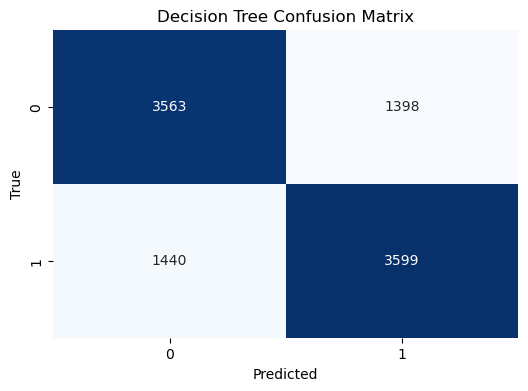

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure dt_pred is based on the test set
dt_pred = dt_model.predict(X_test_tfidf)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree Confusion Matrix')



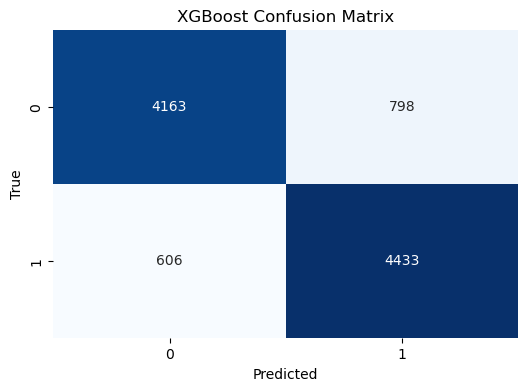

In [52]:
# XGBoost
plot_confusion_matrix(y_test_encoded, xgb_pred, 'XGBoost Confusion Matrix')

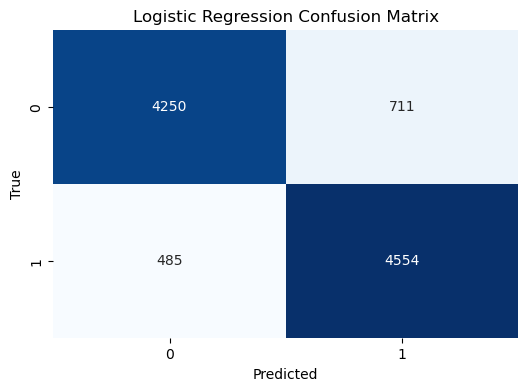

In [53]:
# Logistic Regression
plot_confusion_matrix(y_test, lr_pred, 'Logistic Regression Confusion Matrix')



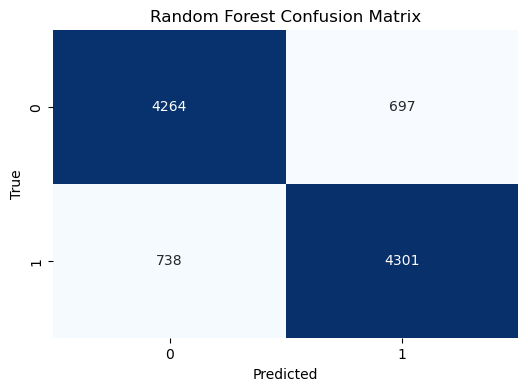

In [54]:

# Random Forest
plot_confusion_matrix(y_test, rf_pred, 'Random Forest Confusion Matrix')

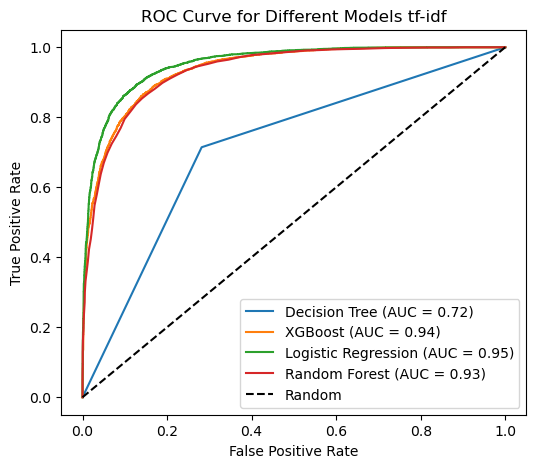

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model_probs, y_true, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, model_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Get probabilities for each model
dt_probs = dt_model.predict_proba(X_test_tfidf)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test_tfidf)[:, 1]
lr_probs = lr_model.decision_function(X_test_tfidf)
rf_probs = rf_model.predict_proba(X_test_tfidf)[:, 1]

# Plot ROC curves
plt.figure(figsize=(6, 5))

plot_roc_curve(dt_probs, y_test_encoded, 'Decision Tree')
plot_roc_curve(xgb_probs, y_test_encoded, 'XGBoost')
plot_roc_curve(lr_probs, y_test_encoded, 'Logistic Regression')
plot_roc_curve(rf_probs, y_test_encoded, 'Random Forest')


plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models tf-idf')
plt.legend(loc='lower right')
plt.show()


# `Bag of words

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_bow = count_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_bow = count_vectorizer.transform(X_test)


In [57]:
dt_model_bow = DecisionTreeClassifier(random_state=42)
dt_model_bow.fit(X_train_bow, y_train)
dt_pred_bow = dt_model_bow.predict(X_test_bow)
print("Decision Tree Classification Report (BoW):\n", classification_report(y_test, dt_pred_bow))


Decision Tree Classification Report (BoW):
               precision    recall  f1-score   support

    negative       0.72      0.73      0.72      4961
    positive       0.73      0.72      0.73      5039

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



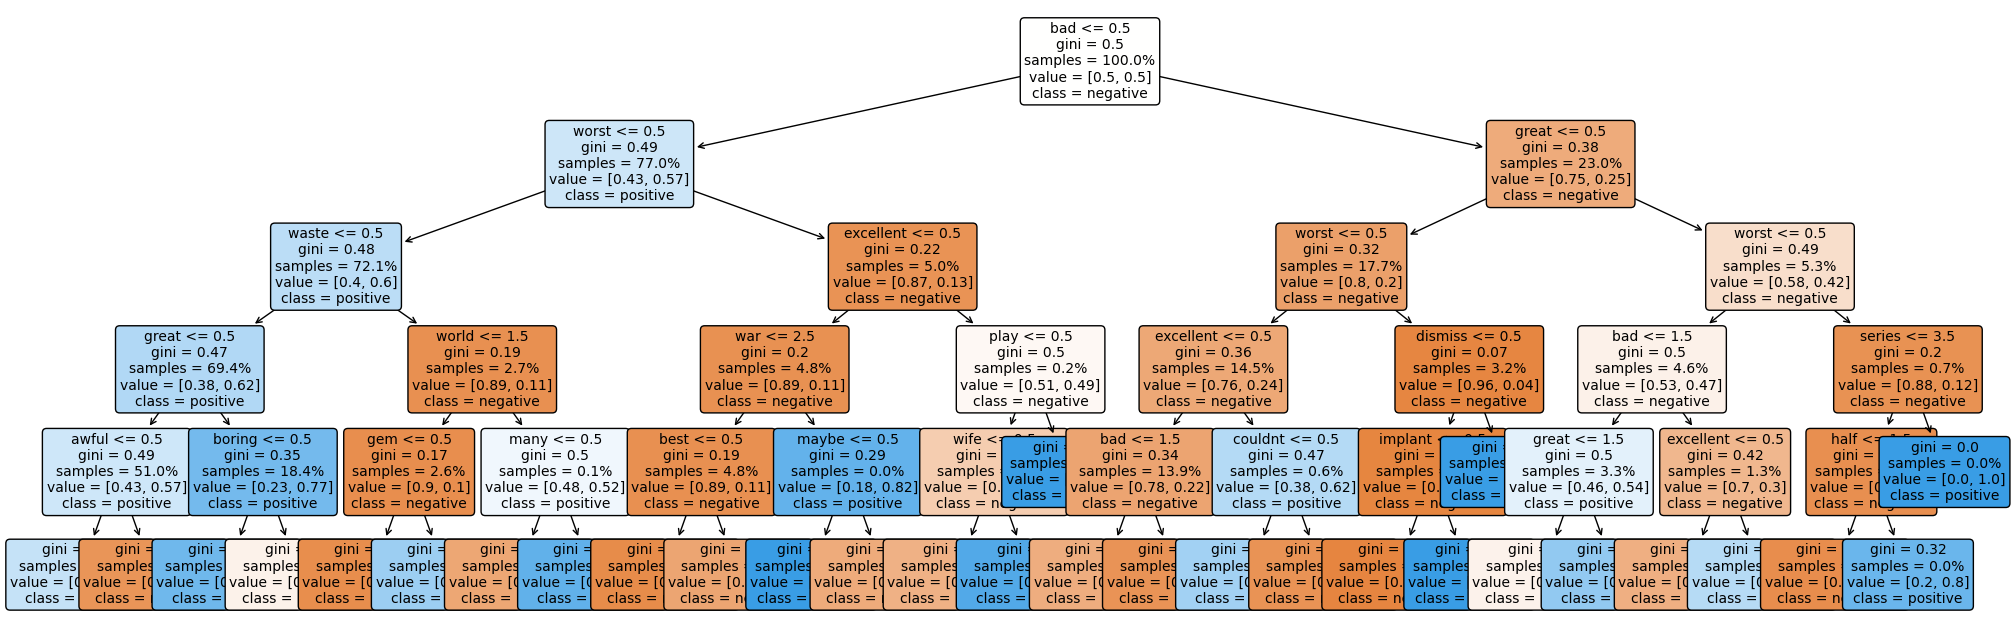

In [58]:
# Train a decision tree classifier with a maximum depth of 5
dt_model_bow = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_bow.fit(X_train_bow, y_train)

# Visualize the decision tree
plt.figure(figsize=(25, 8))
plot_tree(dt_model_bow, feature_names=count_vectorizer.get_feature_names_out(), class_names=['negative', 'positive'], filled=True, rounded=True, fontsize=10, precision=2, impurity=True, proportion=True)
plt.show()

In [59]:
xgb_model_bow = XGBClassifier(random_state=42)
xgb_model_bow.fit(X_train_bow, y_train_encoded)
xgb_pred_bow = xgb_model_bow.predict(X_test_bow)
print("\nXGBoost Classification Report (BoW):\n", classification_report(y_test_encoded, xgb_pred_bow))



XGBoost Classification Report (BoW):
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      4961
           1       0.84      0.89      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [60]:
lr_model_bow = SGDClassifier(loss='log', random_state=42)
lr_model_bow.fit(X_train_bow, y_train)
lr_pred_bow = lr_model_bow.predict(X_test_bow)
print("\nLogistic Regression Classification Report (BoW):\n", classification_report(y_test, lr_pred_bow))



Logistic Regression Classification Report (BoW):
               precision    recall  f1-score   support

    negative       0.91      0.86      0.89      4961
    positive       0.87      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [61]:
rf_model_bow = RandomForestClassifier(random_state=42)
rf_model_bow.fit(X_train_bow, y_train)
rf_pred_bow = rf_model_bow.predict(X_test_bow)
print("\nRandom Forest Classification Report (BoW):\n", classification_report(y_test, rf_pred_bow))



Random Forest Classification Report (BoW):
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.86      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



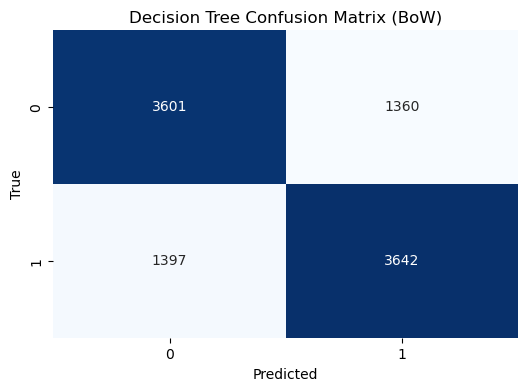

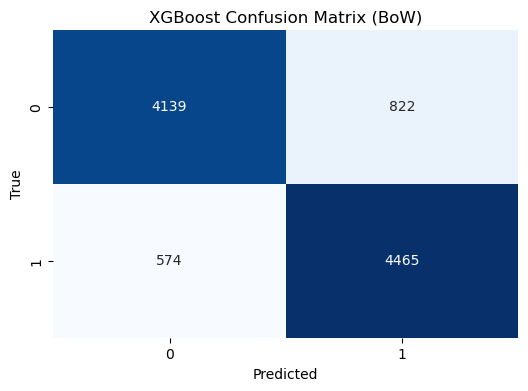

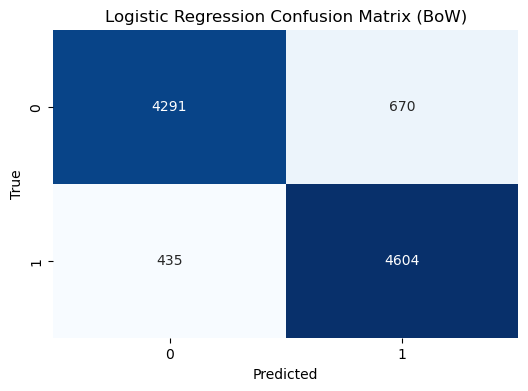

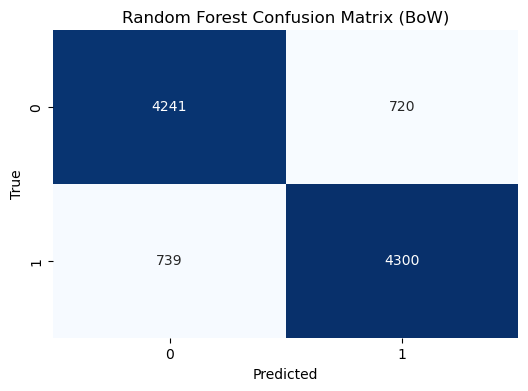

In [62]:
# Decision Tree
plot_confusion_matrix(y_test, dt_pred_bow, 'Decision Tree Confusion Matrix (BoW)')

# XGBoost
plot_confusion_matrix(y_test_encoded, xgb_pred_bow, 'XGBoost Confusion Matrix (BoW)')

# Logistic Regression
plot_confusion_matrix(y_test, lr_pred_bow, 'Logistic Regression Confusion Matrix (BoW)')

# Random Forest
plot_confusion_matrix(y_test, rf_pred_bow, 'Random Forest Confusion Matrix (BoW)')


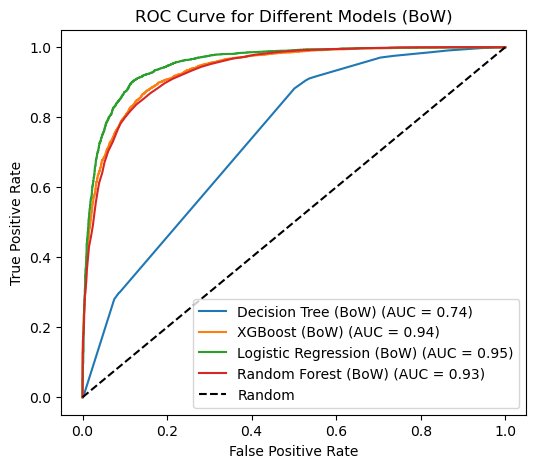

In [63]:
# Get probabilities for each model (BoW)
dt_probs_bow = dt_model_bow.predict_proba(X_test_bow)[:, 1]
xgb_probs_bow = xgb_model_bow.predict_proba(X_test_bow)[:, 1]
lr_probs_bow = lr_model_bow.decision_function(X_test_bow)
rf_probs_bow = rf_model_bow.predict_proba(X_test_bow)[:, 1]

# Plot ROC curves (BoW)
plt.figure(figsize=(6, 5))
plot_roc_curve(dt_probs_bow, y_test_encoded, 'Decision Tree (BoW)')
plot_roc_curve(xgb_probs_bow, y_test_encoded, 'XGBoost (BoW)')
plot_roc_curve(lr_probs_bow, y_test_encoded, 'Logistic Regression (BoW)')
plot_roc_curve(rf_probs_bow, y_test_encoded, 'Random Forest (BoW)')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models (BoW)')
plt.legend(loc='lower right')
plt.show()


# word2vec

In [64]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
# Tokenize the text data
X_train_tokens = X_train.apply(word_tokenize)
X_test_tokens = X_test.apply(word_tokenize)

In [66]:
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)

In [67]:
# Function to get the average vector for a document
def average_vector(model, tokens, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

In [68]:
# Get Word2Vec vectors for each document
X_train_w2v = np.vstack([average_vector(word2vec_model, tokens, 100) for tokens in X_train_tokens])
X_test_w2v = np.vstack([average_vector(word2vec_model, tokens, 100) for tokens in X_test_tokens])

# Decision tree

In [69]:
# Decision Tree
dt_model_w2v = DecisionTreeClassifier(random_state=42)
dt_model_w2v.fit(X_train_w2v, y_train)
dt_pred_w2v = dt_model_w2v.predict(X_test_w2v)
print("Decision Tree Classification Report (Word2Vec):\n", classification_report(y_test, dt_pred_w2v))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred_w2v))

Decision Tree Classification Report (Word2Vec):
               precision    recall  f1-score   support

    negative       0.72      0.73      0.73      4961
    positive       0.73      0.72      0.73      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

Confusion Matrix:
 [[3624 1337]
 [1395 3644]]


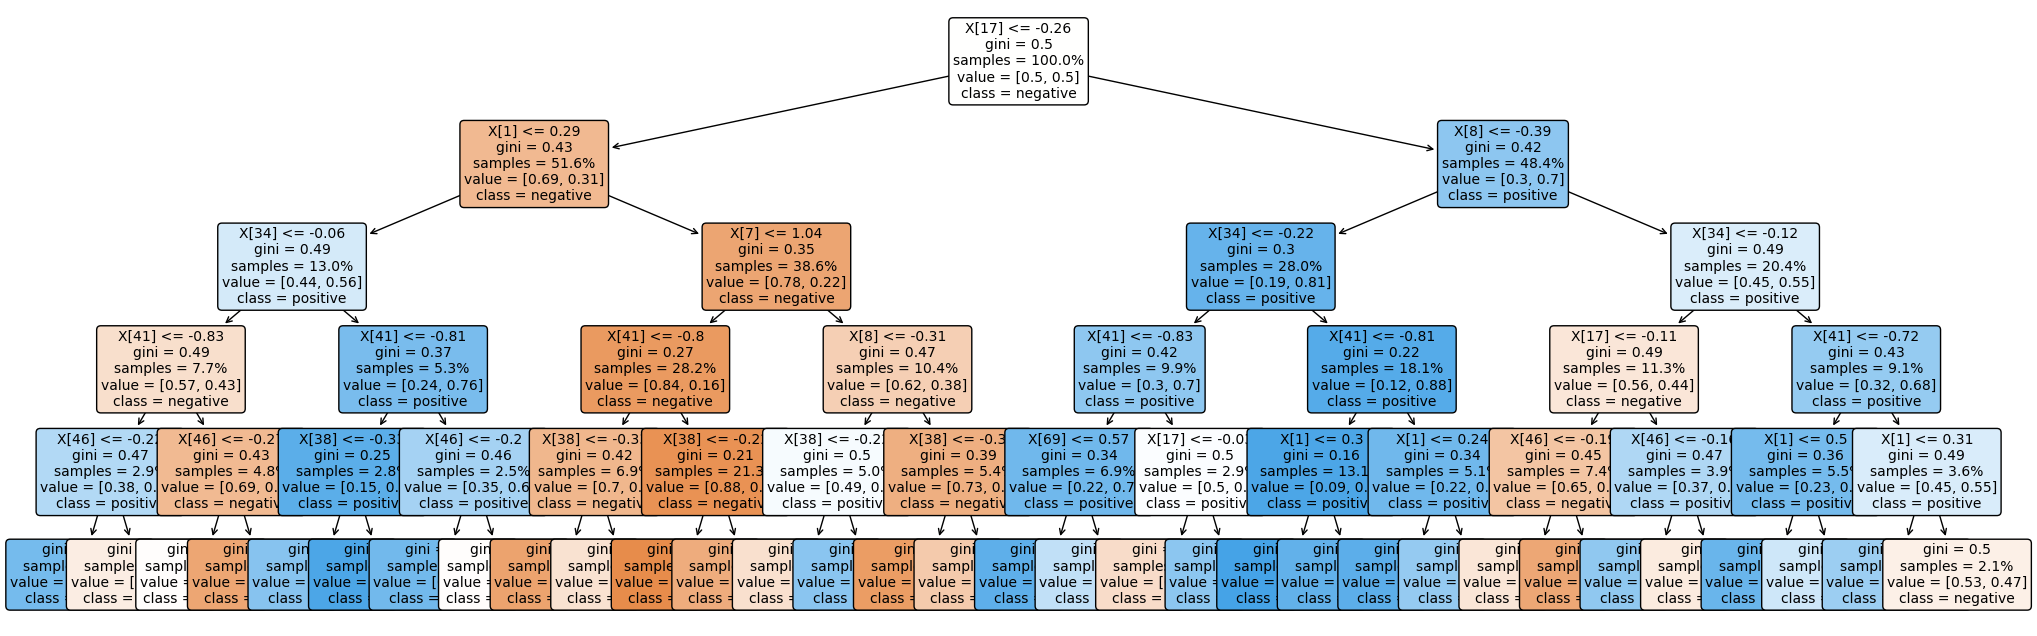

In [70]:
# Train a decision tree classifier with a maximum depth of 5
dt_model_w2v = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_w2v.fit(X_train_w2v, y_train)

# Visualize the decision tree
plt.figure(figsize=(25, 8))
plot_tree(dt_model_w2v,feature_names=None , class_names=['negative', 'positive'], filled=True, rounded=True, fontsize=10, precision=2, impurity=True, proportion=True)
plt.show()

# Random forest

In [71]:
# Random Forest
rf_model_w2v = RandomForestClassifier(random_state=42)
rf_model_w2v.fit(X_train_w2v, y_train)
rf_pred_w2v = rf_model_w2v.predict(X_test_w2v)
print("\nRandom Forest Classification Report (Word2Vec):\n", classification_report(y_test, rf_pred_w2v))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred_w2v))


Random Forest Classification Report (Word2Vec):
               precision    recall  f1-score   support

    negative       0.84      0.81      0.83      4961
    positive       0.82      0.85      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Confusion Matrix:
 [[4014  947]
 [ 755 4284]]


# XGboost

In [72]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable for both training and test sets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost
xgb_model_w2v = XGBClassifier(random_state=42)
xgb_model_w2v.fit(X_train_w2v, y_train_encoded)
xgb_pred_w2v = xgb_model_w2v.predict(X_test_w2v)

# Convert predictions back to original class labels
y_test_pred = label_encoder.inverse_transform(xgb_pred_w2v)

# Display classification report and confusion matrix
print("\nXGBoost Classification Report (Word2Vec):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


XGBoost Classification Report (Word2Vec):
               precision    recall  f1-score   support

    negative       0.86      0.83      0.85      4961
    positive       0.84      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
 [[4142  819]
 [ 700 4339]]


# Logistic regression

In [73]:
lr_model_w2v = LogisticRegression(random_state=42)
lr_model_w2v.fit(X_train_w2v, y_train)
lr_pred_w2v = lr_model_w2v.predict(X_test_w2v)

# Display classification report and confusion matrix
print("Logistic Regression Classification Report (Word2Vec):\n", classification_report(y_test, lr_pred_w2v))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred_w2v))

Logistic Regression Classification Report (Word2Vec):
               precision    recall  f1-score   support

    negative       0.86      0.84      0.85      4961
    positive       0.84      0.87      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
 [[4153  808]
 [ 672 4367]]


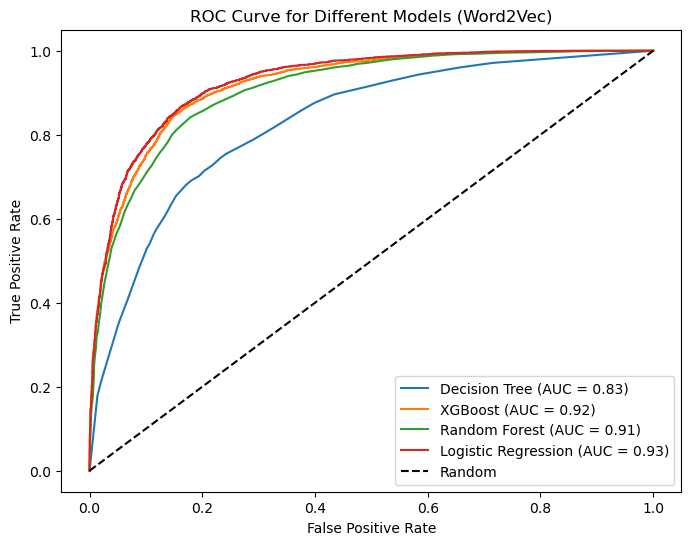

In [74]:
# Get probabilities for each model (Word2Vec)
dt_probs_w2v = dt_model_w2v.predict_proba(X_test_w2v)[:, 1]
xgb_probs_w2v = xgb_model_w2v.predict_proba(X_test_w2v)[:, 1]
rf_probs_w2v = rf_model_w2v.predict_proba(X_test_w2v)[:, 1]
lr_probs_w2v = lr_model_w2v.decision_function(X_test_w2v)

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_encoded, dt_probs_w2v)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_encoded, xgb_probs_w2v)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_encoded, rf_probs_w2v)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_encoded, lr_probs_w2v)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Random Line (Random Model)
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models (Word2Vec)')
plt.legend(loc='lower right')
plt.show()